In [5]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablation"
pois_df = pd.read_csv(os.path.join(res_path, "pois_results.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(int)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)

# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
# print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


                                 clean_meanstd       adv_meanstd median
dataset     alpha beta gamma                                           
co-citeseer 0     0    2      72.85 $\pm$ 0.43  70.82 $\pm$ 1.13  2.5\%
                  1    2      72.85 $\pm$ 0.43  70.82 $\pm$ 0.84  2.7\%
            1     0    2      72.85 $\pm$ 0.43  72.15 $\pm$ 0.51  1.0\%
                  1    2      72.85 $\pm$ 0.43  72.13 $\pm$ 0.70  1.0\%
co-cora     0     0    1      79.00 $\pm$ 1.07  75.89 $\pm$ 1.94  3.2\%
                       2      79.00 $\pm$ 1.07  75.89 $\pm$ 1.94  3.2\%
                  1    1      79.00 $\pm$ 1.07  77.13 $\pm$ 1.28  2.6\%
                       2      79.00 $\pm$ 1.07  76.28 $\pm$ 1.11  3.0\%
            1     0    1      79.00 $\pm$ 1.07  78.52 $\pm$ 0.83  0.7\%
                       2      79.00 $\pm$ 1.07  78.49 $\pm$ 0.76  0.7\%
                  1    1      79.00 $\pm$ 1.07  78.49 $\pm$ 0.63  1.1\%
                       2      79.00 $\pm$ 1.07  78.46 $\pm$ 0.66

In [14]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN"
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_melaPGD_abl.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)

# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
# print(len(df))
# tmp0 = df
tmp0 = df[(df['alpha'] ==0.1) & (df['beta'] == 0) & (df['gamma'] == 4)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.1   0    4      74.15 $\pm$ 0.17  55.19 $\pm$ 1.71  25.6\%
co-cora     0.1   0    4      78.29 $\pm$ 0.84  56.06 $\pm$ 2.40  28.4\%


In [1]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablation"
pois_df = pd.read_csv(os.path.join(res_path, "pois_results.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(int)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)

# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
# print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


                             clean_meanstd       adv_meanstd median
dataset alpha beta gamma                                           
co-cora 0     0    2      76.77 $\pm$ 0.42  71.94 $\pm$ 0.58  6.4\%
              1    2      76.77 $\pm$ 0.47  70.55 $\pm$ 0.30  8.2\%
              2    2      76.77 $\pm$ 0.43  71.47 $\pm$ 2.80  8.7\%
              4    2      76.77 $\pm$ 0.47  75.50 $\pm$ 0.40  1.7\%
              10   2      76.77 $\pm$ 0.47  76.00 $\pm$ 0.16  1.0\%
        1     0    2      76.77 $\pm$ 0.57  75.22 $\pm$ 0.05  2.0\%
              2    2      76.77 $\pm$ 0.57  75.81 $\pm$ 0.37  1.2\%
        2     0    2      76.77 $\pm$ 0.57  75.30 $\pm$ 0.16  1.9\%
              2    2      76.77 $\pm$ 0.57  75.52 $\pm$ 0.37  1.6\%
        4     0    2      76.77 $\pm$ 0.57  75.26 $\pm$ 0.21  2.0\%
              2    2      76.77 $\pm$ 0.57  75.33 $\pm$ 0.52  1.9\%
        10    0    2      76.77 $\pm$ 0.57  75.44 $\pm$ 0.16  1.7\%
              2    2      76.77 $\pm$ 0.57  75.1

$\alpha$ vary
----

In [1]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablation"
pois_df = pd.read_csv(os.path.join(res_path, "pois_results.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df = df[(df['gamma']==2.0)]
df["alpha"] = df["alpha"]
df["beta"] = df["beta"]
df["gamma"] = df["gamma"]

# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
# print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


                               clean_meanstd       adv_meanstd median
dataset alpha  beta  gamma                                           
co-cora 0.000  0.00  2.0    76.77 $\pm$ 0.57  71.75 $\pm$ 0.47  6.5\%
               0.01  2.0    76.77 $\pm$ 0.57  71.68 $\pm$ 0.16  6.6\%
               0.10  2.0    76.77 $\pm$ 0.57  71.79 $\pm$ 0.42  6.5\%
               1.00  2.0    76.77 $\pm$ 0.57  70.46 $\pm$ 0.42  8.2\%
               2.00  2.0    76.77 $\pm$ 0.57  70.13 $\pm$ 0.78  8.7\%
               4.00  2.0    76.77 $\pm$ 0.57  75.30 $\pm$ 0.47  1.9\%
               10.00 2.0    76.77 $\pm$ 0.57  75.96 $\pm$ 0.05  1.1\%
        0.001  2.00  2.0    76.77 $\pm$ 0.57  69.53 $\pm$ 0.99  9.4\%
        0.010  0.00  2.0    76.77 $\pm$ 0.57  71.82 $\pm$ 0.47  6.4\%
               0.01  2.0    76.77 $\pm$ 0.57  71.60 $\pm$ 0.26  6.7\%
               0.10  2.0    76.77 $\pm$ 0.57  71.79 $\pm$ 0.00  6.5\%
               1.00  2.0    76.77 $\pm$ 0.57  70.64 $\pm$ 0.26  8.0\%
               2.00 

# $\epsilon$ vary

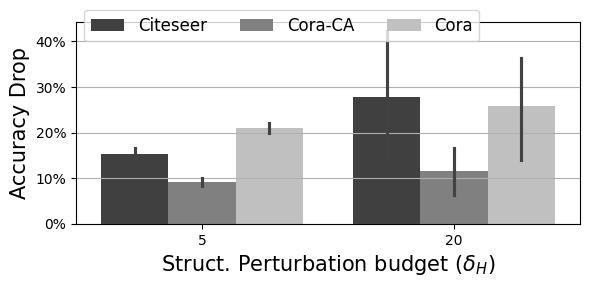

In [30]:
import pandas as pd 
import os 
from matplotlib import pyplot as plt 
import seaborn as sns 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN"
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_melaPGD_abl_eps.csv"))
which='poisoning'
compare_df = pois_df 
plt.figure(figsize=(6, 3))
type = 'delH'
# type='delX'
if type == 'delX':
    x = 'epsilon'
else:
    x = 'ptb_rate'
compare_df2 = compare_df.copy()
compare_df2 = compare_df2[compare_df2['attack'] == 'mla_pgd']
# compare_df2 = compare_df2[compare_df2.ptb_rate.isin([0.05,0.2])]
compare_df2.replace({'dataset': {'co-citeseer': 'Citeseer', 'co-cora': 'Cora', 'coauth_cora': 'Cora-CA'}}, inplace=True)
compare_df2['ptb_rate'] = (compare_df2['ptb_rate']*100).astype(int)
sns.barplot(
    data=compare_df2,
    x=x,
    y='acc_drop%',
    hue='dataset',
    palette='gray',
    hue_order=['Citeseer','Cora-CA','Cora'],
    errorbar='ci'  # You can change to "ci" if you want confidence interval instead
)
# plt.legend(loc='best', ncol=3,fontsize= 12)
plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.0, 1.1),fontsize= 12)
ax = plt.gca()
ax.yaxis.set_major_formatter('{x:1.0f}%')
# ax.xaxis.set_major_formatter('{x:2d}%')
plt.ylabel(r'Accuracy Drop', fontsize=15)
if type == 'delX':
    plt.xlabel(r'Feature perturbation budget ($\delta_X)$',fontsize = 15)
else:
    plt.xlabel(r'Struct. Perturbation budget ($\delta_H$)',fontsize = 15)

plt.grid(True, axis='y')
plt.tight_layout()
# plt.show()
os.makedirs("./figs", exist_ok=True)
if type == 'delX':
    plt.savefig(f"./figs/{which}_acc_delXvsAcc.pdf", bbox_inches='tight')
else:
    plt.savefig(f"./figs/{which}_acc_ptbvsAcc.pdf", bbox_inches='tight')

In [56]:
import pandas as pd
import numpy as np

POIS_CSV = "base_newsplit/pois_results_ICML.csv"
EVASION_CSV = "base_newsplit/evasion_results_ICML.csv"

# ---- keep table format (3 model blocks) but allow aliases in CSV
METHOD_BLOCKS = {
    "HyperMLP": ["HyperMLP", "MLP", "HyperMLP*", "HyperMLP "],
    "AllSetTransformer": ["AllSetTransformer", "AllsetTrans.", "AllsetTrans", "AllSetTrans", "AllSet_Transformer"],
    "HGNN": ["HGNN", "HGNN "],
}

# ---- keep your row order/labels, but map to whatever keys appear in CSV
ROW_ORDER = ["RandFeat", "RandFlip", "GradArgMax", r"\mla-PGD", r"\mla-FGSM"]

ATTACK_ALIASES = {
    "RandFeat": ["RandFeat", "Rand-feat", "randfeat", "rand_feat", "Rand_Feature", "rand_feature", "RandFeatures"],
    "RandFlip": ["RandFlip", "Rand-flip", "randflip", "rand_flip", "Rand_Flip", "random_flip", "RandFlips"],
    "GradArgMax": ["GradArgMax", "GradArgmax", "gradargmax", "grad_argmax", "grad-argmax"],
    r"\mla-PGD": ["mla_pgd", "mla-pgd", "mlaPGD", "mla"],
    r"\mla-FGSM": ["mla_fgsm", "mla-fgsm", "mlaFGSM"],
}


DATASET_DISPLAY = {
    "co-citeseer": "Citeseer",
    "co-cora": "Cora",
    "coauth_cora": "Cora-CA",
}

def _mean_std_str(x, decimals=2):
    if len(x) == 0:
        return ""
    mu = float(np.mean(x))
    sd = float(np.std(x, ddof=1)) if len(x) > 1 else 0.0
    return f"{mu:.{decimals}f} $\\pm$ {sd:.{decimals}f}"

def _median_str(x, decimals=1):
    if len(x) == 0:
        return ""
    return f"{float(np.median(x)):.{decimals}f}"

def _cell(acc_mean_std, drop_med):
    if (acc_mean_std == "") and (drop_med == ""):
        return ""
    if (acc_mean_std != "") and (drop_med != ""):
        return f"{acc_mean_std} / {drop_med}"
    if acc_mean_std != "":
        return f"{acc_mean_std} / "
    return f" / {drop_med}"

def _pick_existing_method(df, candidates):
    existing = set(df["method"].astype(str).unique())
    for c in candidates:
        if c in existing:
            return c
    return None

def _compute_clean_header(df_method_dataset):
    # assumes clean_test is accuracy in [0,1]
    if df_method_dataset.empty:
        return ""
    per_seed = df_method_dataset.groupby("seed")["clean_test"].median().to_numpy(dtype=float) * 100.0
    return _mean_std_str(per_seed, decimals=2)

def _compute_attack_stats(df_sub):
    if df_sub.empty:
        return "", ""
    adv = df_sub["adv_test"].to_numpy(dtype=float) * 100.0
    drop = df_sub["acc_drop%"].to_numpy(dtype=float)  # already in %
    return _mean_std_str(adv, decimals=2), _median_str(drop, decimals=1)

def build_table_for_dataset(pois_df, eva_df, dataset_key, caption=None, label=None):
    ds_name = DATASET_DISPLAY.get(dataset_key, dataset_key)
    if caption is None:
        caption = f"Comparison of different adversarial attacks (poisoning and evasion) for {ds_name}. $^{{**}}$ means statistically significant."
    if label is None:
        label = f"tab:res_{dataset_key.replace('-', '').replace('_','')}"

    # resolve actual method names in CSV for each block
    resolved = {}
    for block, aliases in METHOD_BLOCKS.items():
        resolved[block] = _pick_existing_method(pois_df if not pois_df.empty else eva_df, aliases)

    # clean headers from poisoning df (fallback to evasion df if needed)
    def clean_header_for(block):
        meth = resolved[block]
        if meth is None:
            return ""
        src = pois_df if not pois_df.empty else eva_df
        df_md = src[(src["dataset"] == dataset_key) & (src["method"] == meth)]
        return _compute_clean_header(df_md)

    hyper_clean = clean_header_for("HyperMLP")
    allset_clean = clean_header_for("AllSetTransformer")
    hgnn_clean = clean_header_for("HGNN")

    hyper_header = f"HyperMLP ({hyper_clean})" if hyper_clean else "HyperMLP (\\,\\,)"
    allset_header = f"AllsetTrans. ({allset_clean})" if allset_clean else "AllsetTrans. (\\,\\,)"
    hgnn_header = f"HGNN ({hgnn_clean})" if hgnn_clean else "HGNN (\\,\\,)"

    def get_cell(df_attack, block, is_pois):
        meth = resolved[block]
        if meth is None:
            return ""
        df_sub = df_attack[(df_attack["dataset"] == dataset_key) & (df_attack["method"] == meth)]
        return _cell(*_compute_attack_stats(df_sub))

    rows_tex = []
    for row_name in ROW_ORDER:
        attack_keys = ATTACK_ALIASES.get(row_name, [])
        # pick the first attack key that exists in each CSV
        def pick_attack(df):
            existing = set(df["attack"].astype(str).unique())
            for a in attack_keys:
                if a in existing:
                    return a
            return None

        a_p = pick_attack(pois_df) if not pois_df.empty else None
        a_e = pick_attack(eva_df) if not eva_df.empty else None

        pois_attack_df = pois_df[(pois_df["dataset"] == dataset_key) & (pois_df["attack"] == a_p)] if a_p else pois_df.iloc[0:0]
        eva_attack_df  = eva_df[(eva_df["dataset"] == dataset_key) & (eva_df["attack"] == a_e)] if a_e else eva_df.iloc[0:0]

        hyper_p = get_cell(pois_attack_df, "HyperMLP", True)
        hyper_e = get_cell(eva_attack_df, "HyperMLP", False)
        all_p   = get_cell(pois_attack_df, "AllSetTransformer", True)
        all_e   = get_cell(eva_attack_df, "AllSetTransformer", False)
        hg_p    = get_cell(pois_attack_df, "HGNN", True)
        hg_e    = get_cell(eva_attack_df, "HGNN", False)

        rows_tex.append(
            f"{row_name}        \n"
            f"& {hyper_p}  & {hyper_e}\n"
            f"& {all_p}  & {all_e}\n"
            f"& {hg_p}  & {hg_e} \\\\\n"
        )

    table_tex = (
        "\\begin{table*}[t!]\n"
        f"\\caption{{{caption}}}\n"
        "\\centering\n"
        "\\resizebox{\\textwidth}{!}{\n"
        "\\begin{tabular}{l|cc|cc|cc}\n"
        "\\toprule\n"
        "\\textbf{Attack} \n"
        f"& \\multicolumn{{2}}{{c|}}{{\\textbf{{{hyper_header}}}}} \n"
        f"& \\multicolumn{{2}}{{c|}}{{\\textbf{{{allset_header}}}}} \n"
        f"& \\multicolumn{{2}}{{c}}{{\\textbf{{{hgnn_header}}}}} \\\\\n"
        "& Poison / Drop (P) & Evasion / Drop (E) \n"
        "& Poison / Drop (P) & Evasion / Drop (E) \n"
        "& Poison / Drop (P) & Evasion / Drop (E) \\\\\n"
        "\\midrule\n"
        + "".join(rows_tex) +
        "\\bottomrule\n"
        "\\end{tabular}}\n"
        f"\\label{{{label}}}\n"
        "\\vspace*{-.5em}\n"
        "\\end{table*}\n"
    )
    return table_tex

def main():
    pois_df = pd.read_csv(POIS_CSV)
    eva_df  = pd.read_csv(EVASION_CSV)

    # ensure expected numeric columns exist
    for df in (pois_df, eva_df):
        for c in ["clean_test", "adv_test", "acc_drop%"]:
            if c in df.columns:
                df[c] = pd.to_numeric(df[c], errors="coerce")

    datasets = sorted(set(pois_df["dataset"].unique()) | set(eva_df["dataset"].unique()))
    for ds in datasets:
        tex = build_table_for_dataset(pois_df, eva_df, ds, label=f"tab:res_{ds.replace('-', '').replace('_','')}")
        out_name = f"table_{ds}.tex"
        with open(out_name, "w", encoding="utf-8") as f:
            f.write(tex)
        print(f"[saved] {out_name}")

if __name__ == "__main__":
    main()


[saved] table_co-citeseer.tex
[saved] table_co-cora.tex
[saved] table_coauth_cora.tex


In [122]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results1.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
df = df[df.attack == 'mla_fgsm']
# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.loss == 'MSE']
# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


72
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      71.98 $\pm$ 0.30  57.16 $\pm$ 3.84  22.5\%
            0.01  1    4      72.01 $\pm$ 0.25  57.16 $\pm$ 3.91  22.6\%
            0.10  1    4      71.98 $\pm$ 0.30  57.13 $\pm$ 3.85  22.6\%
            1.00  1    4      72.07 $\pm$ 0.18  57.13 $\pm$ 3.85  22.8\%
            2.00  1    4      72.04 $\pm$ 0.32  57.13 $\pm$ 3.93  22.7\%
            4.00  1    4      71.98 $\pm$ 0.30  57.16 $\pm$ 3.91  22.6\%
co-cora     0.00  1    4      79.51 $\pm$ 1.18  58.31 $\pm$ 1.72  26.7\%
            0.01  1    4      79.51 $\pm$ 1.32  58.31 $\pm$ 1.72  26.8\%
            0.10  1    4      79.47 $\pm$ 1.25  58.31 $\pm$ 1.72  26.7\%
            1.00  1    4      79.47 $\pm$ 1.22  58.35 $\pm$ 1.75  26.5\%
            2.00  1    4      79.47 $\pm$ 1.22  58.35 $\pm$ 1.71  26.5\%
            4.00  1    4      79.47 $\pm$ 1.20  

In [ ]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results1.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
df = df[df.loss == 'MSE']
# df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


72
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      72.01 $\pm$ 0.32  65.61 $\pm$ 1.16   8.4\%
            0.01  1    4      72.04 $\pm$ 0.23  64.58 $\pm$ 1.38   9.9\%
            0.10  1    4      72.07 $\pm$ 0.18  68.87 $\pm$ 1.29   4.0\%
            1.00  1    4      72.01 $\pm$ 0.25  67.06 $\pm$ 1.24   6.1\%
            2.00  1    4      72.01 $\pm$ 0.25  66.61 $\pm$ 1.22   8.0\%
            4.00  1    4      71.98 $\pm$ 0.30  65.76 $\pm$ 2.90   8.2\%
co-cora     0.00  1    4      79.51 $\pm$ 1.21  65.66 $\pm$ 1.31  17.9\%
            0.01  1    4      79.47 $\pm$ 1.22  65.25 $\pm$ 2.60  17.8\%
            0.10  1    4      79.51 $\pm$ 1.18  67.76 $\pm$ 1.85  15.0\%
            1.00  1    4      79.54 $\pm$ 1.17  72.67 $\pm$ 1.33   8.8\%
            2.00  1    4      79.54 $\pm$ 1.17  73.34 $\pm$ 1.72   7.7\%
            4.00  1    4      79.51 $\pm$ 1.18  

In [40]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
df = df[df['eta_H'] == 0.001]
df = df[df['T'] ==100]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


24
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      73.07 $\pm$ 0.10  36.38 $\pm$ 4.51  51.7\%
            0.01  1    4      73.04 $\pm$ 0.06  63.47 $\pm$ 0.97  13.2\%
            0.10  1    4      73.04 $\pm$ 0.12  63.68 $\pm$ 3.54  13.4\%
            1.00  1    4      73.10 $\pm$ 0.06  62.59 $\pm$ 1.19  14.4\%
            2.00  1    4      73.04 $\pm$ 0.06  67.18 $\pm$ 3.34   8.1\%
            4.00  1    4      73.01 $\pm$ 0.07  62.80 $\pm$ 2.24  15.1\%


In [127]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results2.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
df = df[df['eta_H'] == 0.001]
# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


24
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      73.07 $\pm$ 0.00  48.04 $\pm$ 4.01  33.6\%
            0.01  1    4      73.04 $\pm$ 0.06  66.55 $\pm$ 1.57   8.5\%
            0.10  1    4      73.04 $\pm$ 0.06  67.42 $\pm$ 0.97   7.8\%
            1.00  1    4      73.04 $\pm$ 0.06  66.46 $\pm$ 1.92   9.3\%
            2.00  1    4      73.04 $\pm$ 0.06  68.33 $\pm$ 2.34   6.5\%
            4.00  1    4      73.01 $\pm$ 0.07  66.21 $\pm$ 0.84   8.9\%


In [126]:
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results3.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
df = df[df['eta_H'] == 0.001]
df = df[df['T'] ==100]
# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


72
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      73.07 $\pm$ 0.00  36.35 $\pm$ 4.52  51.8\%
            0.01  1    4      73.04 $\pm$ 0.12  63.56 $\pm$ 1.11  13.1\%
            0.10  1    4      73.04 $\pm$ 0.06  63.71 $\pm$ 3.51  13.4\%
            1.00  1    4      73.10 $\pm$ 0.06  62.65 $\pm$ 1.11  14.4\%
            2.00  1    4      73.07 $\pm$ 0.00  67.15 $\pm$ 3.35   8.2\%
            4.00  1    4      73.10 $\pm$ 0.06  62.77 $\pm$ 2.18  15.1\%
co-cora     0.00  1    4      77.99 $\pm$ 0.59  61.85 $\pm$ 3.14  21.1\%
            0.01  1    4      77.95 $\pm$ 0.62  57.75 $\pm$ 1.44  25.4\%
            0.10  1    4      77.95 $\pm$ 0.52  68.43 $\pm$ 1.01  12.3\%
            1.00  1    4      77.88 $\pm$ 0.68  68.98 $\pm$ 1.78  10.4\%
            2.00  1    4      77.95 $\pm$ 0.52  67.98 $\pm$ 2.24  12.8\%
            4.00  1    4      77.95 $\pm$ 0.62  

# MeLA-FGSM ablation

## epsilon=0

In [99]:
# Loss = MSE
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_fgsm.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
df = df[df.attack == 'mla_fgsm']
# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.loss == 'MSE']
epsilon = 0 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


48
                                 clean_meanstd       adv_meanstd median
dataset     alpha beta gamma                                           
co-citeseer 0.00  1    4      73.07 $\pm$ 0.00  72.28 $\pm$ 1.22  1.6\%
            0.01  1    4      73.10 $\pm$ 0.06  72.25 $\pm$ 1.16  1.6\%
            0.10  1    4      73.04 $\pm$ 0.12  72.25 $\pm$ 1.16  1.5\%
            1.00  1    4      73.07 $\pm$ 0.10  72.28 $\pm$ 1.22  1.5\%
            2.00  1    4      73.07 $\pm$ 0.00  72.25 $\pm$ 1.16  1.6\%
            4.00  1    4      73.07 $\pm$ 0.10  72.28 $\pm$ 1.22  1.5\%
co-cora     0.00  1    4      77.95 $\pm$ 0.62  74.85 $\pm$ 1.21  3.9\%
            0.01  1    4      77.99 $\pm$ 0.59  74.82 $\pm$ 1.17  4.0\%
            0.10  1    4      77.99 $\pm$ 0.50  74.82 $\pm$ 1.17  3.9\%
            1.00  1    4      77.99 $\pm$ 0.59  74.85 $\pm$ 1.09  4.0\%
            2.00  1    4      77.95 $\pm$ 0.62  74.89 $\pm$ 1.20  3.8\%
            4.00  1    4      77.95 $\pm$ 0.52  74.89 $\pm$ 1

In [100]:
# Loss = L2
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_fgsm.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
df = df[df.attack == 'mla_fgsm']
# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.loss == 'L2']
epsilon = 0 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


48
                                 clean_meanstd       adv_meanstd median
dataset     alpha beta gamma                                           
co-citeseer 0.00  1    4      73.07 $\pm$ 0.10  72.25 $\pm$ 1.16  1.5\%
            0.01  1    4      73.10 $\pm$ 0.06  72.28 $\pm$ 1.22  1.6\%
            0.10  1    4      73.04 $\pm$ 0.06  72.25 $\pm$ 1.16  1.6\%
            1.00  1    4      73.04 $\pm$ 0.06  72.28 $\pm$ 1.22  1.5\%
            2.00  1    4      73.07 $\pm$ 0.00  72.28 $\pm$ 1.22  1.6\%
            4.00  1    4      73.04 $\pm$ 0.06  72.25 $\pm$ 1.16  1.6\%
co-cora     0.00  1    4      77.92 $\pm$ 0.55  75.00 $\pm$ 0.90  3.8\%
            0.01  1    4      77.92 $\pm$ 0.55  74.85 $\pm$ 1.18  3.8\%
            0.10  1    4      77.92 $\pm$ 0.55  74.82 $\pm$ 1.17  3.8\%
            1.00  1    4      77.95 $\pm$ 0.52  74.89 $\pm$ 1.21  3.7\%
            2.00  1    4      77.95 $\pm$ 0.53  74.93 $\pm$ 1.24  3.8\%
            4.00  1    4      77.99 $\pm$ 0.59  74.82 $\pm$ 1

## epsilon=0.05

In [134]:
# Loss = MSE
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN"
# res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_fgsm.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
df = df[df.attack == 'mla_fgsm']
# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.loss == 'MSE']
epsilon = 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


72
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            0.01  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            0.10  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            1.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            2.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            4.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
co-cora     0.00  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            0.01  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            0.10  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            1.00  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            2.00  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            4.00  1    4      78.36 $\pm$ 0.49  

In [15]:
# Loss = L2
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_fgsm.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
df = df[df.attack == 'mla_fgsm']
# df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
df = df[df.loss == 'L2']
epsilon = 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


72
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      73.04 $\pm$ 0.06  55.71 $\pm$ 3.93  21.6\%
            0.01  1    4      73.01 $\pm$ 0.07  55.71 $\pm$ 3.93  21.6\%
            0.10  1    4      73.04 $\pm$ 0.06  55.68 $\pm$ 3.91  21.7\%
            1.00  1    4      73.01 $\pm$ 0.07  55.71 $\pm$ 3.93  21.6\%
            2.00  1    4      73.04 $\pm$ 0.06  55.71 $\pm$ 3.93  21.6\%
            4.00  1    4      73.07 $\pm$ 0.00  55.71 $\pm$ 3.93  21.6\%
co-cora     0.00  1    4      78.03 $\pm$ 0.57  56.24 $\pm$ 5.57  29.5\%
            0.01  1    4      77.92 $\pm$ 0.55  56.24 $\pm$ 5.57  29.4\%
            0.10  1    4      77.95 $\pm$ 0.52  56.20 $\pm$ 5.50  29.4\%
            1.00  1    4      77.92 $\pm$ 0.56  56.20 $\pm$ 5.50  29.5\%
            2.00  1    4      77.95 $\pm$ 0.62  56.24 $\pm$ 5.57  29.5\%
            4.00  1    4      77.99 $\pm$ 0.59  

In [5]:
# HyperMLP
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
# res_path = './hypergraphMLP'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_melaPGD.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
df = df[df.attack == 'mla_fgsm']

# df = df[df.attack == 'mla_pgd']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


72
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            0.01  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            0.10  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            1.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            2.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
            4.00  1    4      74.12 $\pm$ 0.12  69.35 $\pm$ 0.15   6.4\%
co-cora     0.00  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            0.01  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            0.10  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            1.00  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            2.00  1    4      78.36 $\pm$ 0.49  67.58 $\pm$ 0.56  14.3\%
            4.00  1    4      78.36 $\pm$ 0.49  

# MeLA-D (AAAI)


In [179]:
# Loss = L2
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_meladAAAI.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


7
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      74.15 $\pm$ 0.17  62.14 $\pm$ 0.43  16.2\%
            0.01  1    4       74.28 $\pm$ nan   61.59 $\pm$ nan  17.1\%
co-cora     0.00  1    4      78.29 $\pm$ 0.84  56.20 $\pm$ 1.98  28.2\%
            0.01  1    4      78.29 $\pm$ 0.84  56.79 $\pm$ 3.03  27.4\%


In [185]:
# Loss = MSE
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_meladAAAI.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
df = df[df.loss == 'MSE']
# df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


12
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      73.07 $\pm$ 0.00  65.04 $\pm$ 0.09  11.0\%
            0.01  1    4      73.07 $\pm$ 0.00  64.98 $\pm$ 1.20  11.1\%
co-cora     0.00  1    4      77.62 $\pm$ 0.10  62.11 $\pm$ 0.94  20.0\%
            0.01  1    4      77.70 $\pm$ 0.00  61.96 $\pm$ 0.73  20.2\%
coauth_cora 0.00  1    4      83.60 $\pm$ 0.84  65.58 $\pm$ 0.84  21.5\%
            0.01  1    4      83.53 $\pm$ 0.94  65.66 $\pm$ 0.31  21.4\%


In [2]:
# Loss = MSE
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_meladAAAI_zeroinit.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
df = df[df.loss == 'MSE']
# df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


18
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      73.01 $\pm$ 0.09  69.32 $\pm$ 0.00   5.0\%
            0.01  1    4      73.01 $\pm$ 0.09  69.20 $\pm$ 0.17   5.2\%
co-cora     0.00  1    4      77.62 $\pm$ 0.10  69.20 $\pm$ 1.15  10.8\%
            0.01  1    4      77.70 $\pm$ 0.21  69.35 $\pm$ 1.36  10.7\%
coauth_cora 0.00  1    4      83.60 $\pm$ 0.84  75.70 $\pm$ 0.10   9.4\%
            0.01  1    4      83.60 $\pm$ 0.84  75.26 $\pm$ 0.10  10.0\%
            1.00  1    4      83.53 $\pm$ 0.94  75.41 $\pm$ 0.73   9.7\%
            2.00  1    4      83.53 $\pm$ 0.94  75.41 $\pm$ 0.31   9.7\%
            4.00  1    4      83.53 $\pm$ 0.94  74.96 $\pm$ 0.10  10.3\%


# Mela-PGD

In [35]:
# Loss = MSE
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_melaPGD.csv"))

df = pois_df 
print(df.columns)
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla_pgd']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
df = df[df.loss == 'MSE']
# df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


Index(['All_num_layers', 'Classifier_hidden', 'Classifier_num_layers', 'GPR',
       'HCHA_symdegnorm', 'HNHN_alpha', 'HNHN_beta',
       'HNHN_nonlinear_inbetween', 'HyperGCN_fast', 'HyperGCN_mediators',
       'LearnMask', 'MLP_hidden', 'MLP_num_layers', 'PMA', 'T', 'UniGNN_degE',
       'UniGNN_degV', 'UniGNN_use_norm', 'acc_drop%', 'add_self_loop',
       'adv_test', 'adv_train', 'adv_val', 'aggregate', 'alpha', 'attack',
       'beta', 'clean_test', 'clean_train', 'clean_val', 'cuda', 'dataset',
       'deepset_input_norm', 'deg_shift_l1', 'deg_shift_l2', 'deg_shift_linf',
       'display_step', 'dname', 'dropout', 'edge_card_shift_l1',
       'edge_card_shift_l2', 'edge_card_shift_linf', 'embedding_shift',
       'epochs', 'epsilon', 'eta_H', 'eta_X', 'exclude_self', 'exec_time',
       'feature_noise', 'gamma', 'h_l0', 'heads', 'laplacian_norm', 'loss',
       'lr', 'method', 'model', 'normalization', 'normtype', 'num_classes',
       'num_edges', 'num_edges_perturbed', 'num_epo

In [36]:
# Loss = L2
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_melaPGD.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla_pgd']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


72
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      74.12 $\pm$ 0.12  58.54 $\pm$ 1.34  20.4\%
            0.01  1    4      74.12 $\pm$ 0.12  57.37 $\pm$ 1.15  22.5\%
            0.10  1    4      74.12 $\pm$ 0.12  55.59 $\pm$ 2.42  25.1\%
            1.00  1    4      74.12 $\pm$ 0.12  58.97 $\pm$ 1.64  20.8\%
            2.00  1    4      74.12 $\pm$ 0.12  62.77 $\pm$ 0.48  15.1\%
            4.00  1    4      74.12 $\pm$ 0.12  64.43 $\pm$ 2.77  13.6\%
co-cora     0.00  1    4      78.36 $\pm$ 0.49  57.31 $\pm$ 0.60  27.0\%
            0.01  1    4      78.36 $\pm$ 0.49  56.87 $\pm$ 0.50  27.4\%
            0.10  1    4      78.36 $\pm$ 0.49  55.43 $\pm$ 0.65  29.3\%
            1.00  1    4      78.36 $\pm$ 0.49  65.40 $\pm$ 1.05  16.2\%
            2.00  1    4      78.36 $\pm$ 0.49  65.14 $\pm$ 0.55  16.9\%
            4.00  1    4      78.36 $\pm$ 0.49  

In [7]:
# HyperMLP 
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
res_path = './hypergraphMLP'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_melaPGD.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla_pgd']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


80
                                 clean_meanstd       adv_meanstd  median
dataset     alpha beta gamma                                            
co-citeseer 0.00  1    4      71.59 $\pm$ 0.73  58.76 $\pm$ 3.37  19.2\%
            0.01  1    4      71.59 $\pm$ 0.73  57.82 $\pm$ 3.02  20.2\%
            0.10  1    4      71.59 $\pm$ 0.73  57.28 $\pm$ 2.00  20.4\%
            1.00  1    4      71.59 $\pm$ 0.73  67.27 $\pm$ 0.53   6.0\%
co-cora     0.00  1    4      73.67 $\pm$ 0.99  63.85 $\pm$ 1.31  14.2\%
            0.01  1    4      73.67 $\pm$ 0.99  62.59 $\pm$ 1.48  16.1\%
            0.10  1    4      73.67 $\pm$ 0.99  61.26 $\pm$ 1.91  17.3\%
            1.00  1    4      73.67 $\pm$ 0.99  66.21 $\pm$ 3.04  11.5\%
            2.00  1    4      73.67 $\pm$ 0.99  65.03 $\pm$ 0.98  11.6\%
            4.00  1    4      73.67 $\pm$ 0.99  65.77 $\pm$ 1.13  10.5\%
            8.00  1    4      73.67 $\pm$ 0.99  65.51 $\pm$ 0.95  11.0\%
coauth_cora 0.00  1    4      76.77 $\pm$ 1.98  

# Evasion results 

In [60]:
# MeLA-PGD 
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
res_path = './base_newsplit'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_ICML2.csv"))
# pois_df = pd.read_csv(os.path.join(res_path, "evasion_results_ICML.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']
df = df[df.attack == 'Rand-flip']
# df = df[df.attack == 'Rand-feat']
# df = df[df.attack == 'gradargmax']
# df = df[df.attack == 'mla_pgd']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
# df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'method']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'method']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'method']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'method'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'method'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


10
                       clean_meanstd       adv_meanstd median
dataset     method                                           
co-citeseer MLP     73.77 $\pm$ 0.29  69.59 $\pm$ 0.93  5.4\%
coauth_cora MLP     75.45 $\pm$ 0.75  69.22 $\pm$ 1.04  8.6\%


In [10]:
# MeLA-FGSM 
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
res_path = './base_newsplit'
# pois_df = pd.read_csv(os.path.join(res_path, "pois_results_ICML.csv"))
pois_df = pd.read_csv(os.path.join(res_path, "evasion_results_ICML.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(int)
df["gamma"] = df["gamma"].astype(int)
df = df[df.attack == 'mla_fgsm']

# df = df[df.attack == 'mla_pgd']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
# df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['epsilon'] == epsilon]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp0 = df
# tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
tmp = tmp0.groupby(['dataset', 'method']).agg({'clean_test': ['mean', 'std']})
tmp2 = tmp0.groupby(['dataset', 'method']).agg({'adv_test': ['mean', 'std']})
tmp3 = tmp0.groupby(['dataset', 'method']).agg({'acc_drop%': ['min','max','median']})
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=['dataset', 'method'])
merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'method'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])


45
                                  clean_meanstd       adv_meanstd  median
dataset     method                                                       
co-citeseer AllSetTransformer  72.95 $\pm$ 0.27  46.91 $\pm$ 1.04  35.5\%
            HGNN               74.13 $\pm$ 0.10  45.63 $\pm$ 0.36  38.2\%
            MLP                71.76 $\pm$ 0.74  50.14 $\pm$ 0.52  30.2\%
co-cora     AllSetTransformer  77.81 $\pm$ 0.53  39.73 $\pm$ 0.43  48.6\%
            HGNN               78.46 $\pm$ 0.48  40.00 $\pm$ 0.22  49.0\%
            MLP                73.68 $\pm$ 0.86  43.22 $\pm$ 0.53  40.9\%
coauth_cora AllSetTransformer  83.69 $\pm$ 0.51  26.91 $\pm$ 0.53  67.8\%
            HGNN               82.90 $\pm$ 0.24  23.90 $\pm$ 0.24  71.1\%
            MLP                74.77 $\pm$ 1.08  28.39 $\pm$ 0.44  61.8\%


# Adversarial Training

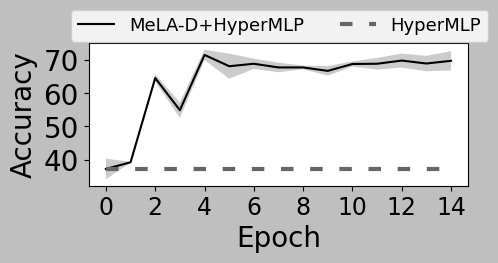

In [18]:
import numpy as np
import os
from matplotlib import pyplot as plt
plt.style.use('grayscale')
# plt.rcParams['text.usetex'] = True
# root = './mla_final_citeseer'
# root = './mla_final_coauth_cora'
root = './hypergraphMLP_Melad/'
# root = './icml26_baseline_adv'
seeds = range(11,13)
fontsize = 22
sur_trajs = []
target_trajs = []
# method='AllSetTransformer' 
# method = 'HGNN'
method='MLP'
mapp= {'MLP':'HyperMLP','HGNN':'HGNN','AllSetTransformer':'AllSetTrans.'}
# data = 'co-citeseer'
data='co-cora'
for seed in seeds:
    trajectory_path = os.path.join(root, method+"_mla_fgsm_"+data+"_"+str(seed)+"_")
    # sur_test_file = os.path.join(trajectory_path, "surrogate_test_trajectory.npz")
    # target_test_file = os.path.join(trajectory_path, "target_test_trajectory.npz")
    sur_test_file = trajectory_path+ "robust_pois.npz"
    target_test_file = trajectory_path+ "clean_pois.npz"
    sur_traj_i = np.load(sur_test_file)['arr_0']
    target_traj_i = np.load(target_test_file)['arr_0']
    sur_trajs.append(sur_traj_i)
    target_trajs.append(target_traj_i)

# Convert to numpy arrays for easier manipulation
sur_trajs = np.array(sur_trajs)
target_trajs = np.array(target_trajs)
# print(sur_trajs)
# Calculate mean and standard deviation
sur_mean = sur_trajs.mean(axis=0)
sur_std = sur_trajs.std(axis=0)
target_mean = target_trajs.mean(axis=0)
target_std = target_trajs.std(axis=0)

# Plot surrogate trajectory
plt.figure(figsize=(5, 3))
# plt.fill_between(range(len(sur_mean)), sur_mean - sur_std, sur_mean + sur_std, alpha=0.2, label="Surrogate CI")
plt.fill_between(range(len(sur_mean)), sur_mean - 1.5*sur_std, sur_mean + 1.5*sur_std, alpha=0.2)
plt.plot(sur_mean, label="MeLA-D+"+mapp[method])

# Plot target trajectory
# plt.fill_between(range(len(target_mean)), target_mean - target_std, target_mean + target_std, alpha=0.2, label="Target CI")
# plt.fill_between(range(len(target_mean)), target_mean - target_std, target_mean + target_std, alpha=0.2)
plt.plot(target_mean, label=mapp[method],linestyle=(0, (3, 4)),linewidth= 3)
# plt.xticks(np.arange(1, len(target_mean)+1,2), fontsize=fontsize-2)
plt.legend(fontsize=fontsize,ncol=2)
plt.xlabel("Epoch",fontsize=fontsize-2)
plt.ylabel("Accuracy",fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.xticks(fontsize=fontsize-5)
plt.legend(loc='upper left',bbox_to_anchor=(-0.07,1.3),ncol=2,fontsize=13)
plt.tight_layout()
# plt.title("Surrogate vs Target Test Accuracy with Confidence Interval")
# plt.show()
# plt.savefig(f"./figs/surrogate_vs_target_test_accuracy_cociteseer.pdf", bbox_inches='tight')
plt.savefig(f"adv_train.pdf", bbox_inches='tight')

75
Index(['All_num_layers', 'Classifier_hidden', 'Classifier_num_layers', 'GPR',
       'HCHA_symdegnorm', 'HNHN_alpha', 'HNHN_beta',
       'HNHN_nonlinear_inbetween', 'HyperGCN_fast', 'HyperGCN_mediators',
       'LearnMask', 'MLP_hidden', 'MLP_num_layers', 'PMA', 'T', 'UniGNN_degE',
       'UniGNN_degV', 'UniGNN_use_norm', 'acc_drop%', 'add_self_loop',
       'adv_test', 'adv_train', 'adv_val', 'aggregate', 'alpha', 'attack',
       'beta', 'clean_test', 'clean_train', 'clean_val', 'cuda', 'dataset',
       'deepset_input_norm', 'deg_shift_l1', 'deg_shift_l2', 'deg_shift_linf',
       'display_step', 'dname', 'dropout', 'edge_card_shift_l1',
       'edge_card_shift_l2', 'edge_card_shift_linf', 'edges_changed',
       'embedding_shift', 'epochs', 'epsilon', 'eta_H', 'eta_X',
       'exclude_self', 'exec_time', 'feature_noise', 'gamma', 'h_l0', 'heads',
       'laplacian_norm', 'loss', 'lr', 'method', 'model', 'nodes_changed',
       'normalization', 'normtype', 'num_classes', 'num_ed

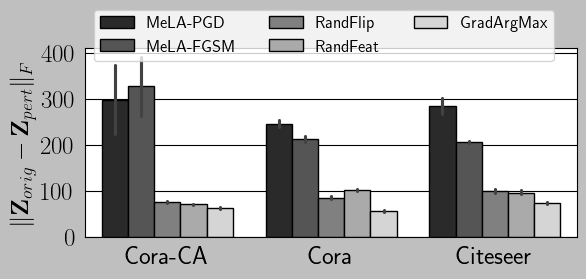

([<matplotlib.patches.Rectangle at 0x705a68676130>,
 ['MeLA-PGD', 'MeLA-FGSM', 'RandFlip', 'RandFeat', 'GradArgMax'])

<Figure size 640x480 with 0 Axes>

In [33]:
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt

datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = './base_newsplit'
# res_path = './Hypergraph-MLP-main/ours/hypergraphMLP_newsplit'
which =  "poisoning" # "robust"
method='MLP'
if which == "poisoning":
    if method=='HGNN':
        compare_df = pd.read_csv(os.path.join(res_path, "pois_results_ICML2.csv")) # re-run due to issues with Randflip
    else:
        compare_df = pd.read_csv(os.path.join(res_path, "pois_results_ICML.csv"))
else:
    compare_df = pd.read_csv(os.path.join(res_path, "evasion_results_ICML.csv"))
compare_df = compare_df.replace({"mla_pgd": 'MeLA-PGD', "mla_fgsm":'MeLA-FGSM', "Rand-flip": 'RandFlip',\
                                          'Rand-feat':'RandFeat','gradargmax':'GradArgMax'
                                          }) 
compare_df = compare_df[compare_df.dataset.isin(datasets)]
compare_df = compare_df[compare_df['model'] == method]

# compare_df = compare_df[compare_df['model'] == 'MLP']
# compare_df = compare_df[compare_df['model'] == 'AllSetTransformer']
print(len(compare_df))

sns.set_style("dark", {'axes.grid' : True})
# sns.set_style("ticks")
plt.style.use('grayscale')
plt.rcParams['text.usetex'] = True
sns.color_palette("gray")
# Create a custom divergent grayscale palette
compare_df.replace({'dataset': {'co-citeseer': 'Citeseer', 'co-cora': 'Cora', 'coauth_cora': 'Cora-CA'}}, inplace=True)
num_shades = compare_df['attack'].nunique()  # Number of unique attack types
# compare_df['deg_norm'] = compare_df['deg_shift_l1'] / compare_df['num_vertices']
compare_df['deg_norm'] = compare_df['deg_shift_l2'] / compare_df['num_vertices']
compare_df['dim_norm'] = compare_df['edge_card_shift_l2'] / compare_df['num_edges']
custom_palette = sns.color_palette("gray", n_colors=num_shades)
print(compare_df.columns)
# sns.set_palette(custom_palette)

# # Preparing the final dataframe
# df_plot = df_merged[['dataset', 'model', column]].copy()
# df_plot = df_plot.reset_index()  # in case dataset/model were index
# column = "edge_card_shift_linf"
# column = "laplacian_norm"
# column = 'semantic_change'
column = 'exec_time'
# column = 'embedding_shift'
# column = 'deg_shift_linf'
# column = "deg_shift_l1"
# column = "deg_shift_l2"
# column = 'deg_norm'
# column = 'dim_norm'

fontsize = 20
labelsize = 20
ord = ['MeLA-PGD','MeLA-FGSM','RandFlip','RandFeat','GradArgMax']
def draw(column, legend = False):
    # ord = ['co-ora','co-citeseer','coauth_cora']
    if column == "edge_card_shift_linf":
        ylabel = r'$\|\mathbf{E}_{orig}|-|\mathbf{E}_{pert}\|_\infty$'
    elif column == "deg_shift_linf":
        ylabel = r'$\|\mathbf{d}_{orig}-\mathbf{d}_{pert}\|_\infty$'
    elif column == "laplacian_norm":
        # ylabel = r'$||\textsc{Lap}(H)-\textsc{Lap}(H_{pert})||_F$'
        ylabel = r'$\|L_{orig} - L_{pert}\|_F$'
    elif column == 'semantic_change':
        compare_df['semantic_change'] = 1- compare_df['semantic_change']
        ylabel = r"$cos(\mathbf{X}_{orig},\mathbf{X}_{pert})$"
    elif column == 'degree_sensitivity':
        ylabel = 'degree_sensitivity'
    elif column == 'exec_time':
        ylabel = r'Attack Time (s)'
    elif column == 'embedding_shift':
        ylabel = r'$\|\mathbf{Z}_{orig}-\mathbf{Z}_{pert}\|_F$'
    elif column == 'deg_norm':
        # ylabel = r'$\frac{1}{\|V\|}||\mathbf{d}_{orig}-\mathbf{d}_{pert}||_1$'
        ylabel = r'$\frac{1}{n}\|\mathbf{d}_{orig}-\mathbf{d}_{pert}\|_F$'
    elif column == 'dim_norm':
        # ylabel = r'$\frac{1}{\|V\|}||\mathbf{d}_{orig}-\mathbf{d}_{pert}||_1$'
        ylabel = r'$\frac{1}{m}\|\mathbf{E}_{orig}|-|\mathbf{E}_{pert}\|_F$'
    elif column == 'deg_shift_l2':
        ylabel = r'$\frac{1}{n}\|\mathbf{d}_{orig}-\mathbf{d}_{pert}\|^2_2$'
    else:
        ylabel = column
    # Plot
    plt.figure(figsize=(6, 3))
    sns.barplot(
        data=compare_df,
        x='dataset',
        y=column,
        hue='attack',
        palette='gray',
        hue_order = ord,
        order=['Cora-CA','Cora', 'Citeseer'])
        # errorbar='ci'  # You can change to "ci" if you want confidence interval instead
    # )
    plt.ylabel(ylabel, fontsize=fontsize-2)
    # plt.xlabel('Dataset',fontsize = 15)
    plt.xlabel(None)
    if column == 'deg_shift_linf':
        plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.0, 1),fontsize= 12)
    elif column == 'exec_time':
        plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.0, 1.25),fontsize= 12)
    else:
        plt.legend(loc='best', ncol=3,fontsize= 12)
    plt.xticks(rotation=0,fontsize=fontsize-2)
    # plt.yticks([0,10**-1,10**0,10**1])
    # plt.yticks(ticks = [0,0.1,1,10])
    # plt.yscale('log')
    ax = plt.gca()
    if column == 'semantic_change':
        plt.ylim(0,compare_df[column].max())
    elif column == 'edge_card_shift_linf': # or column == 'deg_shift_linf':
        plt.yscale('log') 
    elif column == 'embedding_shift':
        plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(0, 1.25),fontsize= 12) 
    elif column == 'laplacian_norm':
        plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(0, 1.25),fontsize= 12)
        plt.yscale('log')
    elif column == 'deg_norm':
        plt.yscale('log')
        ax.set_yticks(ticks = [10**-4, 10**-3,10**-2]) 
        pass
    elif column == "deg_shift_l2":
        plt.yscale('log')
    elif column == 'dim_norm':
        plt.yscale('log')
        ax.set_yticks(ticks = [10**-4, 10**-3,10**-2,10**-1]) 
    elif column == 'exec_time':
        plt.yscale('log')
        ax.set_yticks(ticks = [10**-3,10**-2,10**-1,10**0,10**1]) 
    elif column == 'degree_sensitivity':
        plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(0, 1.25),fontsize= 12)
    else:
        # plt.yscale('log')
        pass
        
    plt.yticks(fontsize=fontsize-2)
    
    label_params = ax.get_legend_handles_labels()
    if not legend:
        ax.get_legend().remove()
    # plt.grid(True, axis='y')
    plt.tight_layout()
    os.makedirs("./figs", exist_ok=True)
    print(which)
    plt.savefig(f"./figs/{which}_{column}3.pdf", bbox_inches='tight')
    plt.show()
    plt.clf()
    return label_params
# draw('exec_time',legend = True)
# draw('degree_sensitivity',legend = True)
# draw('laplacian_norm', legend = True)


draw("embedding_shift", legend = True)
# draw('acc_drop%', legend = True)

poisoning


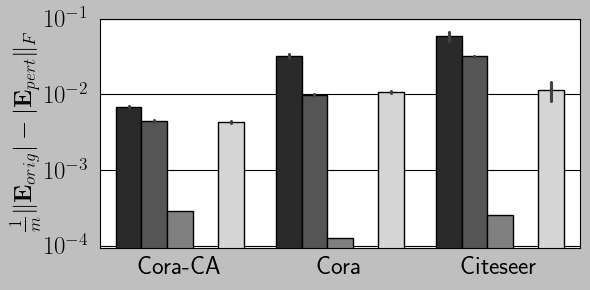

poisoning


<Figure size 640x480 with 0 Axes>

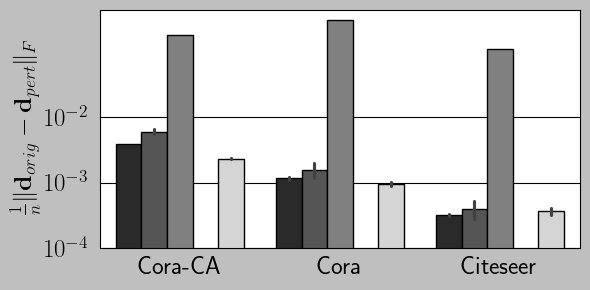

poisoning


<Figure size 640x480 with 0 Axes>

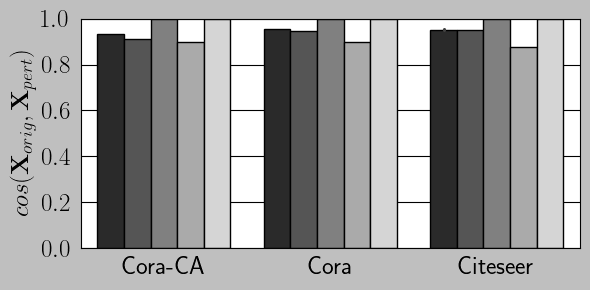

<Figure size 640x480 with 0 Axes>

In [3]:
dim_p = draw('dim_norm')
deg_p = draw('deg_norm')
sem_p = draw('semantic_change')
# draw('deg_shift_l2')
# draw('deg_shift_linf')
# # draw('edge_card_shift_l2')
# # draw('edge_card_shift_linf')
# draw('laplacian_norm')
# draw('embedding_shift')


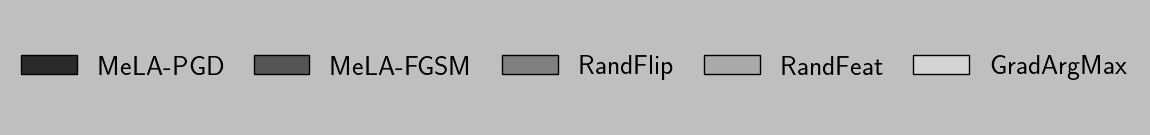

In [4]:
def plot_legend(dr_sm,opt_params,kd_params):
    # _tmp = label_params[0] + label_params2[0]; 
    # print(type(label_params[0]))
    # _tmpp = label_params[1] + label_params2[1]
    # label_params = (_tmp,_tmpp)
    # print(dr_sm)
    figl, axl = plt.subplots(figsize=(14,1.5))
    axl.axis(False)
    # x = dr_sm[0][6:]
    # y = dr_sm[1][6:]
    # print(dr_sm)
    # print(opt_params)
    # print('---')

    # p = ( dr_sm[0][6:] + opt_params[0][1:len(opt_params[0])-1], dr_sm[1][6:] + opt_params[1][1:len(opt_params[0])-1])
    # p = ( dr_sm[0][6:] + opt_params[0][:-1] +kd_params[0][:-1], \
    #      dr_sm[1][6:] + opt_params[1][:-1] +kd_params[1][:-1])
    p = (dr_sm[0],dr_sm[1])
    # print(p)
    axl.legend(*p, loc="center", bbox_to_anchor=(0.5, 0.5), prop={"size":fontsize}, frameon = False, framealpha = 1, fancybox = False,\
               ncol=len(p[1]), fontsize = fontsize, labelspacing = 0.1, columnspacing = 1)
    # plt.tight_layout()
    plt.savefig('./figs/legends.pdf')
    # plt.show()
plot_legend(dim_p,deg_p,sem_p)

In [5]:
# different seed
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./icml26_baseline_adv"
res_path = "./hypergraphMLP_Melad"

pois_df = pd.read_csv(os.path.join(res_path, "adv_results_aaai.csv"))
# pois_df = pd.read_csv(os.path.join(res_path, "adv_results_old.csv"))
df = pois_df 
tmp1 = df.groupby(['dataset'])['clean_acc'].mean().rename('mean')
tmp2 = df.groupby(['dataset'])['clean_acc'].std().rename('std')
tmp = pd.concat([tmp1,tmp2],axis=1).round(2)
# tmp['meanstd'] = tmp.apply(lambda row: f"{row['mean']:.2f} $\\pm$ {row['std']:.2f}")
tmp['meanstd'] = tmp['mean'].astype(str)+" \pm "+tmp['std'].astype(str)
print(tmp)
# print(df)
df.loc[df['rob_gain'] <= 0, 'rob_gain'] = 0.0
# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp = df.groupby([ 'attack', 'dataset', 'model']).agg({'adv_acc_base': ['mean', 'std']})
tmp2 = df.groupby([ 'attack', 'dataset','model']).agg({'adv_acc_rob': ['mean', 'std']})
tmp3 = df.groupby([ 'attack', 'dataset', 'model']).agg({'rob_gain': ['min','max','median']})
# Reset column index to avoid MultiIndex issues
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=[ 'attack', 'dataset', 'model'])
merged_df['base_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['robust_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=[ 'attack', 'dataset', 'model'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}", axis=1).values
merged_df['robust_meanstdmedian'] = merged_df['robust_meanstd'].astype(str)+"/"+merged_df['median']
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
# print(merged_df[["clean_meanstd", "adv_meanstd",'min_max',"median"]])
print(merged_df[["base_meanstd", "robust_meanstdmedian"]])
# print(merged_df[["adv_meanstd","median"]])
    

              mean   std         meanstd
dataset                                 
co-citeseer  73.44  0.88  73.44 \pm 0.88
co-cora      76.03  1.84  76.03 \pm 1.84
coauth_cora  75.85  1.66  75.85 \pm 1.66
75
                                  base_meanstd   robust_meanstdmedian
attack     dataset     model                                         
Rand-feat  co-citeseer MLP    60.97 $\pm$ 1.55  71.33 $\pm$ 0.91/10.1
           co-cora     MLP    64.58 $\pm$ 1.93  75.39 $\pm$ 2.20/10.5
           coauth_cora MLP    71.43 $\pm$ 2.07   76.07 $\pm$ 1.58/5.8
Rand-flip  co-citeseer MLP    68.48 $\pm$ 1.24   73.65 $\pm$ 0.41/5.4
           co-cora     MLP    55.66 $\pm$ 2.41  75.98 $\pm$ 2.20/20.5
           coauth_cora MLP    54.24 $\pm$ 2.36  75.63 $\pm$ 2.28/21.3
gradargmax co-citeseer MLP    68.48 $\pm$ 1.24   73.96 $\pm$ 0.54/5.2
           co-cora     MLP    55.66 $\pm$ 2.41  75.21 $\pm$ 1.86/19.6
           coauth_cora MLP    54.24 $\pm$ 2.36  74.98 $\pm$ 2.15/20.5
mla        co-citeseer

In [7]:
#  seed 33
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
# res_path = "./icml26_baseline_adv"
res_path = "./hypergraphMLP_Melad"

pois_df = pd.read_csv(os.path.join(res_path, "adv_results_aaai2.csv"))
# pois_df = pd.read_csv(os.path.join(res_path, "adv_results_old.csv"))
df = pois_df 
tmp1 = df.groupby(['dataset'])['clean_acc'].mean().rename('mean')
tmp2 = df.groupby(['dataset'])['clean_acc'].std().rename('std')
tmp = pd.concat([tmp1,tmp2],axis=1).round(2)
# tmp['meanstd'] = tmp.apply(lambda row: f"{row['mean']:.2f} $\\pm$ {row['std']:.2f}")
tmp['meanstd'] = tmp['mean'].astype(str)+" \pm "+tmp['std'].astype(str)
print(tmp)
# print(df)
df.loc[df['rob_gain'] <= 0, 'rob_gain'] = 0.0
# epsilon = 0.05 # 0.05
# ptb_rate = 0.2
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
tmp = df.groupby([ 'attack', 'dataset', 'model']).agg({'adv_acc_base': ['mean', 'std']})
tmp2 = df.groupby([ 'attack', 'dataset','model']).agg({'adv_acc_rob': ['mean', 'std']})
tmp3 = df.groupby([ 'attack', 'dataset', 'model']).agg({'rob_gain': ['min','max','median']})
# Reset column index to avoid MultiIndex issues
tmp.columns = tmp.columns.droplevel(0)
tmp2.columns = tmp2.columns.droplevel(0)
tmp3.columns = tmp3.columns.droplevel(0)
# # Merge the dataframes
merged_df = pd.merge(tmp, tmp2, on=[ 'attack', 'dataset', 'model'])
merged_df['base_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
merged_df['robust_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# print(merged_df)
merged_df = pd.merge(merged_df, tmp3, on=[ 'attack', 'dataset', 'model'])
# merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}", axis=1).values
merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}", axis=1).values
merged_df['robust_meanstdmedian'] = merged_df['robust_meanstd'].astype(str)+"/"+merged_df['median']
# print(merged_df)
# merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
# print(merged_df[["clean_meanstd", "adv_meanstd",'min_max',"median"]])
print(merged_df[["base_meanstd", "robust_meanstdmedian"]])
# print(merged_df[["adv_meanstd","median"]])
    

              mean   std         meanstd
dataset                                 
co-citeseer  72.44  0.99  72.44 \pm 0.99
co-cora      74.03  0.85  74.03 \pm 0.85
coauth_cora  73.83  1.21  73.83 \pm 1.21
75
                                  base_meanstd   robust_meanstdmedian
attack     dataset     model                                         
Rand-feat  co-citeseer MLP    63.50 $\pm$ 1.48   71.52 $\pm$ 1.49/8.2
           co-cora     MLP    63.78 $\pm$ 0.61   73.56 $\pm$ 0.79/9.9
           coauth_cora MLP    69.22 $\pm$ 0.80   73.29 $\pm$ 0.59/4.1
Rand-flip  co-citeseer MLP    70.48 $\pm$ 0.39   72.80 $\pm$ 1.07/2.5
           co-cora     MLP    50.34 $\pm$ 1.06  73.50 $\pm$ 0.93/24.2
           coauth_cora MLP    49.36 $\pm$ 0.70  73.56 $\pm$ 0.53/23.8
gradargmax co-citeseer MLP    70.48 $\pm$ 0.39   73.00 $\pm$ 1.09/3.0
           co-cora     MLP    50.34 $\pm$ 1.06  73.59 $\pm$ 1.17/23.9
           coauth_cora MLP    49.36 $\pm$ 0.70  72.73 $\pm$ 0.95/23.9
mla        co-citeseer

In [ ]:
import pandas as pd
import os

# -----------------------
# Config
# -----------------------
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']   # will be shown as Citeseer, Cora-CA, Cora
dataset_display = {
    'co-citeseer': 'Citeseer',
    'co-cora': 'Cora-CA',
    'coauth_cora': 'Cora',
}
attack_order = ['Clean', 'Rand-feat', 'Rand-flip', 'gradargmax', 'mla', 'mla_fgsm']
attack_display = {
    'Clean': r'\textit{Clean}',
    'Rand-feat': 'RandFeat',
    'Rand-flip': 'RandFlip',
    'gradargmax': 'GradArgMax',
    'mla': r'\mla-D',
    'mla_fgsm': r'\mla-FGSM',
}

# set this to whatever model name you want to show (HGNN in your example)
# baseline_model = "MLP"
baseline_model='HGNN'

# Path + file
# res_path = "./hypergraphMLP_Melad"
res_path = 'icml26_baseline_adv'
df = pd.read_csv(os.path.join(res_path, "adv_results_aaai.csv"))

# -----------------------
# Helpers
# -----------------------
def meanstd(series):
    return series.mean(), series.std()

def fmt_meanstd(m, s):
    return f"{m:.2f} $\\pm$ {s:.2f}"

def fmt_gain(g):
    # gain shown as percent (already percent in your file? if it's fraction, multiply by 100 here)
    return f"{g:.1f}\\%"

# Treat negative gains as 0 like your code
if "rob_gain" in df.columns:
    df.loc[df['rob_gain'] <= 0, 'rob_gain'] = 0.0

# Keep only chosen datasets (and optionally chosen model)
df = df[df["dataset"].isin(datasets)].copy()
df_base = df[df["model"] == baseline_model].copy()

# -----------------------
# 1) Clean row (clean hypergraph): HGNN and MeLA-D+HGNN columns
#     Uses clean_acc from the same csv.
# -----------------------
clean_stats = df_base.groupby("dataset")["clean_acc"].agg(["mean", "std"]).reindex(datasets)
clean_row_base = {d: fmt_meanstd(clean_stats.loc[d, "mean"], clean_stats.loc[d, "std"]) for d in datasets}

# "MeLA-D+HGNN / Gain" column on CLEAN: use same clean_acc stats, gain forced 0%
clean_row_rob = {d: clean_row_base[d] + " / 0\\%" for d in datasets}

# -----------------------
# 2) Attack rows (perturbed hypergraph): baseline adv_acc_base vs robust adv_acc_rob + median gain
# -----------------------
# Expected columns in file:
#   adv_acc_base : baseline model on perturbed graph
#   adv_acc_rob  : adversarially trained (MeLA-D+HGNN) on perturbed graph
#   rob_gain     : robustness gain (%) (we will report median)
need_cols = ["attack", "dataset", "model", "adv_acc_base", "adv_acc_rob", "rob_gain"]
missing = [c for c in need_cols if c not in df_base.columns]
if missing:
    raise ValueError(f"Missing required columns in CSV: {missing}")

g = df_base.groupby(["attack", "dataset"])
base_stats = g["adv_acc_base"].agg(["mean", "std"])
rob_stats  = g["adv_acc_rob"].agg(["mean", "std"])
gain_med   = g["rob_gain"].median()

# -----------------------
# 3) Build LaTeX table body rows (Attack | (HGNN, MeLA-D+HGNN/Gain)*3)
# -----------------------
rows = []

# Clean row first (italic)
row = [attack_display["Clean"]]
for d in datasets:
    row.append(clean_row_base[d])
    row.append(clean_row_rob[d])
rows.append(row)

# Attack rows
for a in attack_order[1:]:
    row = [attack_display.get(a, a)]
    for d in datasets:
        if (a, d) not in base_stats.index:
            # no data
            row.extend(["--", "--"])
            continue
        bm, bs = base_stats.loc[(a, d), "mean"], base_stats.loc[(a, d), "std"]
        rm, rs = rob_stats.loc[(a, d), "mean"], rob_stats.loc[(a, d), "std"]
        gm = gain_med.loc[(a, d)]

        base_cell = fmt_meanstd(bm, bs)
        rob_cell  = fmt_meanstd(rm, rs) + " / " + fmt_gain(gm)
        row.extend([base_cell, rob_cell])
    rows.append(row)

# -----------------------
# 4) Emit LaTeX
# -----------------------
header = rf"""
\begin{{table*}}[htb!]
\centering
\resizebox{{\textwidth}}{{!}}{{%
\begin{{tabular}}{{l|cc|cc|cc}}
\toprule
\textbf{{Attack}}
& \multicolumn{{2}}{{c|}}{{\textbf{{{dataset_display[datasets[0]]}}}}}
& \multicolumn{{2}}{{c|}}{{\textbf{{{dataset_display[datasets[1]]}}}}}
& \multicolumn{{2}}{{c}}{{\textbf{{{dataset_display[datasets[2]]}}}}} \\
& {baseline_model} & \mla-D+{baseline_model} / Gain
& {baseline_model} & \mla-D+{baseline_model} / Gain
& {baseline_model} & \mla-D+{baseline_model} / Gain \\
\midrule
"""

body_lines = []
for r in rows:
    body_lines.append(" & ".join(r) + r" \\")
body = "\n".join(body_lines)

footer = r"""
\bottomrule
\end{tabular}
} % end resizebox
\caption{Adversarial training of HGNN (evasion attack).}
\label{tab:advtr_surrogate}
\end{table*}
"""

latex_table = header + body + footer
print(latex_table)



\begin{table*}[htb!]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{l|cc|cc|cc}
\toprule
\textbf{Attack}
& \multicolumn{2}{c|}{\textbf{Citeseer}}
& \multicolumn{2}{c|}{\textbf{Cora-CA}}
& \multicolumn{2}{c}{\textbf{Cora}} \\
& HGNN & \mla-D+HGNN / Gain
& HGNN & \mla-D+HGNN / Gain
& HGNN & \mla-D+HGNN / Gain \\
\midrule
\textit{Clean} & 71.78 $\pm$ 0.65 & 71.78 $\pm$ 0.65 / 0\% & 78.33 $\pm$ 0.89 & 78.33 $\pm$ 0.89 / 0\% & 82.62 $\pm$ 1.38 & 82.62 $\pm$ 1.38 / 0\% \\
RandFeat & 65.92 $\pm$ 1.46 & 71.81 $\pm$ 0.61 / 5.6\% & 72.76 $\pm$ 0.64 & 77.73 $\pm$ 0.89 / 4.7\% & 80.38 $\pm$ 1.60 & 82.66 $\pm$ 1.40 / 1.9\% \\
RandFlip & 65.68 $\pm$ 1.60 & 69.23 $\pm$ 0.58 / 4.1\% & 72.53 $\pm$ 1.04 & 74.59 $\pm$ 0.92 / 1.5\% & 79.00 $\pm$ 0.82 & 80.71 $\pm$ 0.81 / 1.6\% \\
GradArgMax & 69.30 $\pm$ 1.53 & 71.71 $\pm$ 1.40 / 2.9\% & 71.49 $\pm$ 2.43 & 72.94 $\pm$ 2.61 / 1.5\% & 79.56 $\pm$ 1.50 & 80.59 $\pm$ 1.69 / 1.2\% \\
\mla-D & 23.96 $\pm$ 2.31 & 63.94 $\pm$ 1.03 / 38.9\% & 28.21 $\pm$ 

In [13]:
# import pandas as pd
# from scipy.stats import friedmanchisquare
# import os
# import numpy as np

# def draw_CD(avg_ranks, labels,n_datasets,alpha='0.05'):
#     from Orange.evaluation import compute_CD, graph_ranks
#     import matplotlib.pyplot as plt

#     # Your average ranks: lower rank = better
#     # avg_ranks = [1.0, 2.53, 2.93, 4.1, 4.43]
#     # labels = ['mla', 'mla_fgsm', 'Rand-feat', 'gradargmax', 'Rand-flip']
#     # n_datasets = 15  # number of seeds/datasets = number of rows in the Friedman test

#     # Compute critical difference at alpha=0.05
#     cd = compute_CD(avg_ranks, n_datasets, alpha=alpha)

#     # Plot and save
#     plt.figure(figsize=(5, 3))
#     graph_ranks(avg_ranks, labels, cd=cd, width=6)
#     # plt.title("Critical Difference Diagram")
#     plt.show()

# res_path = './base_newsplit'
# # res_path = "C:\\Users\\nahee\\Dropbox\\adverHyp\\MLA5\\Hypergraph-MLP-main\\ours\\hypergraphMLP_newsplit"
# # Load your CSV file
# # df = pd.read_csv(os.path.join(res_path,"pois_results.csv"))  # replace with full path if needed
# df = pd.read_csv(os.path.join(res_path,"evasion_results_ICML.csv"))  # replace with full path if needed
# # df = df[df['dataset'] == 'co-citeseer']
# # df = df[df['dataset'] == 'co-cora']
# df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
# # df = df[df['dataset'] == 'co-cora']
# df = df[df['dataset'] == 'coauth_cora']
# # df = df[df['model'] == 'AllSetTransformer']
# df = df[df['model'] == 'HGNN']
# print(len(df))
# # Pivot the data: rows are (dataset + seed), columns are attack types, values are acc_drop%
# pivot_df = df.pivot_table(index=["dataset", "seed"], columns="attack", values="acc_drop%")

# # Drop rows with missing values (i.e., incomplete runs)
# pivot_df_clean = pivot_df.dropna()

# # Run the Friedman test
# # Extract accuracy drops for each attack type as a separate series
# attack_columns = pivot_df_clean.columns
# attack_scores = [pivot_df_clean[col] for col in attack_columns]

# statistic, p_value = friedmanchisquare(*attack_scores)

# # Print results
# print("Friedman Test Statistic:", round(statistic, 4))
# print("p-value:", format(p_value, ".4e"))

# # Optional: Compute and print average ranks
# average_ranks = pivot_df_clean.rank(axis=1, ascending=False).mean()
# average_ranks.head()
# # print("\nAverage Ranks (lower is better):")
# # print(average_ranks.sort_values())
# # # draw_CD(average_ranks, pivot_df_clean.columns, len(df))


In [12]:
import pandas as pd
from scipy.stats import friedmanchisquare
import os
import numpy as np

# ---------------------------
# Helpers
# ---------------------------
def fmt_p(p: float) -> str:
    """Format p-value like 6.3e^{-4} for LaTeX math mode."""
    if p is None or np.isnan(p):
        return "n/a"
    s = f"{p:.1e}"              # e.g., '6.3e-04'
    mant, exp = s.split("e")
    exp = int(exp)              # -4
    return f"{mant}e^{{{exp}}}" # '6.3e^{-4}'

def friedman_and_ranks(df_sub: pd.DataFrame, attack_order=None):
    """
    df_sub: filtered df for one (dataset, model, scenario) where scenario in {'pois','evasion'}.
    Computes Friedman test and average ranks (lower rank = better, i.e., smaller acc_drop% is better).
    Returns (stat, p, avg_rank_series, attack_columns_list)
    """
    pivot = df_sub.pivot_table(index=["dataset", "seed"], columns="attack", values="acc_drop%")
    pivot = pivot.dropna()

    if pivot.shape[0] < 2 or pivot.shape[1] < 2:
        return np.nan, np.nan, pd.Series(dtype=float), list(pivot.columns)

    attack_cols = list(pivot.columns)
    if attack_order is not None:
        attack_cols = [a for a in attack_order if a in attack_cols]
        pivot = pivot[attack_cols]

    # Friedman test expects each method as a vector across blocks
    scores = [pivot[col].values for col in attack_cols]
    stat, p = friedmanchisquare(*scores)

    # Rank per row: smaller drop is better => ascending=True
    avg_ranks = pivot.rank(axis=1, ascending=False).mean().sort_index()
    return stat, p, avg_ranks, attack_cols

def build_latex_table(results, models, scenarios, attacks, caption, label):
    """
    results[(model, scenario)] = dict(stat=..., p=..., ranks=pd.Series)
    """
    # Header blocks
    ncols = 1 + 2 * len(models)
    colspec = "l|" + "|".join(["cc"] * len(models))

    lines = []
    lines.append(r"\begin{table*}[t]")
    lines.append(r"\centering")
    lines.append(r"\begin{tabular}{" + colspec + r"}")
    lines.append(r"\toprule")

    # Top header row
    header1 = [r"\textbf{Attack}"]
    for m in models:
        header1.append(r"\multicolumn{2}{c" + ("|" if m != models[-1] else "") + r"}{\textbf{" + m + r"}}")
    lines.append(" & ".join(header1) + r" \\")
    # Second header row with stat/p info embedded
    header2 = [""]
    for m in models:
        # poison column
        stat_p = results.get((m, "pois"), {})
        stat_e = results.get((m, "evasion"), {})
        sp_stat = stat_p.get("stat", np.nan)
        sp_p = stat_p.get("p", np.nan)
        se_stat = stat_e.get("stat", np.nan)
        se_p = stat_e.get("p", np.nan)

        cell_pois = (
            r"\begin{tabular}[c]{@{}l@{}}\textbf{Rank (Poison)} \\ "
            + f"Test stat: {sp_stat:.1f} \\\\ "
            + r"p-value: $" + fmt_p(sp_p) + r"$\end{tabular}"
        )
        cell_eva = (
            r"\begin{tabular}[c]{@{}l@{}}\textbf{Rank (Evasion)} \\ "
            + f"Test stat: {se_stat:.1f} \\\\ "
            + r"p-value: $" + fmt_p(se_p) + r"$\end{tabular}"
        )
        header2.extend([cell_pois, cell_eva])

    lines.append(" & ".join(header2) + r" \\")
    lines.append(r"\midrule")

    # Body rows: attacks in a fixed order
    for a in attacks:
        row = [a]
        for m in models:
            for sc in scenarios:
                ranks = results.get((m, sc), {}).get("ranks", pd.Series(dtype=float))
                val = ranks.get(a, np.nan)
                if np.isnan(val):
                    cell = r"--"
                else:
                    # bold best (rank=1.0)
                    cell = f"{val:.1f}"
                    if abs(val - 1.0) < 1e-9:
                        cell = r"\textbf{" + cell + "}"
                row.append(cell)
        lines.append(" & ".join(row) + r" \\")

    lines.append(r"\bottomrule")
    lines.append(r"\end{tabular}")
    lines.append(r"\caption{" + caption + r"}")
    lines.append(r"\label{" + label + r"}")
    lines.append(r"\end{table*}")
    return "\n".join(lines)

# ---------------------------
# Main script
# ---------------------------
res_path = "./base_newsplit"

# Inputs you likely want to change
dataset_name = "co-cora"
dname_map = {"coauth_cora":"Cora-CA",'co-cora':"Cora","co-citeseer":"Citeseer"}
models = ["MLP", "AllSetTransformer", "HGNN"]   # table column groups
attacks_pretty = ["RandFeat", "RandFlip", "GradArgMax", r"\mla-PGD", r"\mla-FGSM"]  # displayed row labels

# Map from your CSV's attack names to display names above (edit keys to match your file)
attack_rename = {
    "Rand-feat": "RandFeat",
    "Rand-Feat": "RandFeat",
    "Rand-flip": "RandFlip",
    "Rand-Flip": "RandFlip",
    "gradargmax": "GradArgMax",
    "GradArgMax": "GradArgMax",
    "mla": r"\mla-D",
    "mla_pgd": r"\mla-PGD",
    "mla-D": r"\mla-D",
    "mla_fgsm": r"\mla-FGSM",
    "mla-FGSM": r"\mla-FGSM",
}

# Files: one for poison, one for evasion (as in your example)
files = {
    "pois": os.path.join(res_path, "pois_results_ICML.csv"),
    "evasion": os.path.join(res_path, "evasion_results_ICML.csv"),
}

# Collect all results
results = {}

for scenario, fpath in files.items():
    df = pd.read_csv(fpath)

    # Standard cleanup (keep consistent with your current pipeline)
    df.loc[df["acc_drop%"] <= 0, "acc_drop%"] = 0.0
    df = df[df["dataset"] == dataset_name].copy()

    # Normalize attack names for table rows
    df["attack"] = df["attack"].map(lambda x: attack_rename.get(x, x))

    for model in models:
        df_sub = df[df["model"] == model].copy()
        stat, p, avg_ranks, attack_cols = friedman_and_ranks(df_sub, attack_order=attacks_pretty)

        results[(model, scenario)] = {
            "stat": stat,
            "p": p,
            "ranks": avg_ranks,
            "attacks": attack_cols,
        }

# Build LaTeX
latex = build_latex_table(
    results=results,
    models=models,
    scenarios=["pois", "evasion"],
    attacks=attacks_pretty,
    caption=f"Statistical ranking of attacks using a non-parametric Friedman test ({dname_map[dataset_name]} dataset).",
    label=f"tab:stat_{dataset_name}",
)

print(latex)


\begin{table*}[t]
\centering
\begin{tabular}{l|cc|cc|cc}
\toprule
\textbf{Attack} & \multicolumn{2}{c|}{\textbf{MLP}} & \multicolumn{2}{c|}{\textbf{AllSetTransformer}} & \multicolumn{2}{c}{\textbf{HGNN}} \\
 & \begin{tabular}[c]{@{}l@{}}\textbf{Rank (Poison)} \\ Test stat: 19.4 \\ p-value: $6.7e^{-4}$\end{tabular} & \begin{tabular}[c]{@{}l@{}}\textbf{Rank (Evasion)} \\ Test stat: 20.0 \\ p-value: $5.0e^{-4}$\end{tabular} & \begin{tabular}[c]{@{}l@{}}\textbf{Rank (Poison)} \\ Test stat: 16.5 \\ p-value: $2.4e^{-3}$\end{tabular} & \begin{tabular}[c]{@{}l@{}}\textbf{Rank (Evasion)} \\ Test stat: 17.1 \\ p-value: $1.8e^{-3}$\end{tabular} & \begin{tabular}[c]{@{}l@{}}\textbf{Rank (Poison)} \\ Test stat: 20.0 \\ p-value: $5.0e^{-4}$\end{tabular} & \begin{tabular}[c]{@{}l@{}}\textbf{Rank (Evasion)} \\ Test stat: 19.4 \\ p-value: $6.7e^{-4}$\end{tabular} \\
\midrule
RandFeat & 4.2 & 3.0 & 4.4 & 4.4 & 5.0 & 5.0 \\
RandFlip & 3.0 & 4.5 & 3.4 & 3.4 & 3.0 & 3.2 \\
GradArgMax & 4.8 & 4.5 & 4.2 & 4.

# Impact of alpha on laplacian drift

62


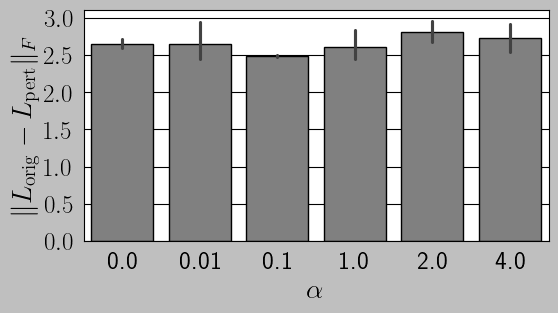

<Figure size 640x480 with 0 Axes>

In [104]:
# Loss = L2
import pandas as pd 
import os 
datasets = ['co-citeseer', 'co-cora', 'coauth_cora']
res_path = "./ablationICML_HGNN/"
# res_path = './ablationICML_AllSetTransformer'
pois_df = pd.read_csv(os.path.join(res_path, "pois_results_melaPGD.csv"))

df = pois_df 
df['clean_test'] = df['clean_test']*100
df['clean_train'] = df['clean_train']*100
df['adv_test'] = df['adv_test']*100
df['adv_train'] = df['adv_train']*100
df.loc[df['acc_drop%'] <= 0, 'acc_drop%'] = 0.0
df["alpha"] = df["alpha"].astype(float)
df["beta"] = df["beta"].astype(float)
df["gamma"] = df["gamma"].astype(int)
# df = df[df.attack == 'mla_fgsm']

df = df[df.attack == 'mla_pgd']
# df = df[df.attack == 'mla_unrolled']
# df = df[df.attack == 'mla_unrolledv2']
# df = df[df.loss == 'MSE']
df = df[df.loss == 'L2']
epsilon = 0.05 # 0.05
# ptb_rate = 0.2
df = df[df['epsilon'] == epsilon]
df = df[df['dataset']=='co-cora']
# df = df[df['alpha']==0.1]
# df = df[df['ptb_rate'] == ptb_rate]
# print(df.columns)
print(len(df))
# tmp0 = df
# # tmp0 = df[(df['alpha'] == 4) & (df['beta'] == 1) & (df['gamma'] == 0)]
# tmp = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'clean_test': ['mean', 'std']})
# tmp2 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'adv_test': ['mean', 'std']})
# tmp3 = tmp0.groupby(['dataset', 'alpha','beta','gamma']).agg({'acc_drop%': ['min','max','median']})
# tmp.columns = tmp.columns.droplevel(0)
# tmp2.columns = tmp2.columns.droplevel(0)
# tmp3.columns = tmp3.columns.droplevel(0)
# # # Merge the dataframes
# merged_df = pd.merge(tmp, tmp2, on=['dataset', 'alpha','beta','gamma'])
# merged_df['clean_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_x')]:.2f} $\\pm$ {row[('std_x')]:.2f}", axis=1).values
# merged_df['adv_meanstd'] = merged_df.apply(lambda row: f"{row[('mean_y')]:.2f} $\\pm$ {row[('std_y')]:.2f}", axis=1).values
# # print(merged_df)
# merged_df = pd.merge(merged_df, tmp3, on=['dataset', 'alpha','beta','gamma'])
# # merged_df['acc_meanstd'] = merged_df.apply(lambda row: f"{row[('mean')]:.2f} $\\pm$ {row[('acc_drop%', 'std')]:.2f}", axis=1).values
# merged_df['min_max'] = merged_df.apply(lambda row: f"{row[('min')]:.0f}-{row[('max')]:.0f}\%", axis=1).values
# merged_df['median'] = merged_df.apply(lambda row: f"{row[('median')]:.1f}\%", axis=1).values
# # print(merged_df)
# # merged_df = merged_df[merged_df['attack'] == 'MeLA-FGSM']
# print(merged_df[["clean_meanstd", "adv_meanstd", "median"]])
plt.style.use('grayscale')
plt.rcParams['text.usetex'] = True
sns.color_palette("gray")
fontsize = 20
labelsize = 20
plt.figure(figsize=(6, 3))
sns.barplot(
    data=df,
    x='alpha',
    y='laplacian_norm',
    color='gray'
)
# sns.barplot(
#     data=df,
#     x='beta',
#     y='embedding_shift',
#     color='gray'
# )
# plt.yscale('log')

# sns.barplot(
#     data=df,
#     x='beta',
#     y='acc_drop%',
#     color='gray'
# )
plt.xlabel(r'$\alpha$',fontsize=fontsize)
plt.ylabel(r'$\|L_{\rm orig} - L_{\rm pert}\|_F$',fontsize=fontsize)
# plt.xlabel(r'$\beta$',fontsize=fontsize)
# plt.ylabel(r'$\frac{1}{n}\|\mathbf{d}_{orig}-\mathbf{d}_{pert}\|^2_2$',fontsize=fontsize)
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.show()
plt.clf()

# $\Delta X$ $\Delta H$ vs accuracy

In [ ]:
import pandas as pd

POISON_CSV = "./base_newsplit/pois_results_ICML_delXdelHabl.csv"  # poisoning CSV (you already uploaded this)
EVASION_CSV = "./base_newsplit/evasion_results_ICML_delXdelHabl.csv"               # <-- change to your evasion CSV path

def load(csv_path: str) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    # ensure required columns exist
    required = {"dataset", "ptb_rate", "epsilon", "clean_test", "acc_drop%"}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Missing columns in {csv_path}: {sorted(missing)}")
    return df

def fmt_cell(sub: pd.DataFrame) -> str:
    if len(sub) == 0:
        return "--"
    acc_mean = sub["clean_test"].mean() * 100
    acc_std = sub["clean_test"].std() * 100
    # if only one run, std is NaN -> treat as 0.00
    if pd.isna(acc_std):
        acc_std = 0.0
    drop_median = sub["acc_drop%"].median()
    return f"{acc_mean:.2f} $\\pm$ {acc_std:.2f} / {drop_median:.1f}"

# ΔH/ΔX definitions
ptb_types = {
    r"$\DelH$":       lambda d: (d["ptb_rate"] > 0) & (d["epsilon"] == 0),
    r"$\DelX$":       lambda d: (d["ptb_rate"] == 0) & (d["epsilon"] > 0),
    r"$\DelH,\DelX$": lambda d: (d["ptb_rate"] > 0) & (d["epsilon"] > 0),
}

datasets = {
    "Citeseer": "co-citeseer",
    "Cora": "co-cora",
}

poison_df = load(POISON_CSV)
evasion_df = load(EVASION_CSV)

# Build LaTeX rows
rows = []
for ptb_name, cond in ptb_types.items():
    r = [ptb_name]

    # Citeseer: Poison then Evasion
    sub_p = poison_df[(poison_df["dataset"] == datasets["Citeseer"]) & cond(poison_df)]
    sub_e = evasion_df[(evasion_df["dataset"] == datasets["Citeseer"]) & cond(evasion_df)]
    r += [fmt_cell(sub_p), fmt_cell(sub_e)]

    # Cora: Poison then Evasion
    sub_p = poison_df[(poison_df["dataset"] == datasets["Cora"]) & cond(poison_df)]
    sub_e = evasion_df[(evasion_df["dataset"] == datasets["Cora"]) & cond(evasion_df)]
    r += [fmt_cell(sub_p), fmt_cell(sub_e)]

    rows.append(r)

# Print full LaTeX table
print(r"""\begin{table}[t]
\caption{Impact of structural ($\DelH$) and feature ($\DelX$) perturbations using \melad~(HyperMLP model)}
\label{tab:decouple} 
\centering
\resizebox{\columnwidth}{!}{%
\begin{tabular}{@{}c|cc|cc@{}}
\toprule
\textbf{Ptb type} & \multicolumn{2}{c|}{\textbf{Citeseer} (73.16 $\pm$ 1.57\%)} & \multicolumn{2}{c}{\textbf{Cora} (77.30 $\pm$ 1.64\%)} \\ 
\midrule
& Poison/Drop (p) & Evasion/Drop (e) & Poison/Drop (p) & Evasion/Drop (e) \\
\cmidrule{2-5}
""")

for r in rows:
    print(f"{r[0]} & {r[1]} & {r[2]} & {r[3]} & {r[4]} \\\\")

print(r"""\bottomrule
\end{tabular}
}
\end{table}""")


$\DelH$ 5
$\DelX$ 5
$\DelH,\DelX$ 5
\begin{table}[t]
\caption{Impact of structural ($\DelH$) and feature ($\DelX$) perturbations using \melad~(HyperMLP model)}
\label{tab:decouple} 
\centering
\resizebox{\columnwidth}{!}{%
\begin{tabular}{@{}c|cc|cc@{}}
\toprule
\textbf{Ptb type} & \multicolumn{2}{c|}{\textbf{Citeseer} (73.16 $\pm$ 1.57\%)} & \multicolumn{2}{c}{\textbf{Cora} (77.30 $\pm$ 1.64\%)} \\ 
\midrule
& Poison/Drop (p) & Evasion/Drop (e) & Poison/Drop (p) & Evasion/Drop (e) \\
\cmidrule{2-5}

$\DelH$ & 71.76 $\pm$ 0.74 / -0.3 & 71.76 $\pm$ 0.74 / -0.7 & 73.68 $\pm$ 0.86 / 0.2 & 73.68 $\pm$ 0.86 / -0.6 \\
$\DelX$ & 71.76 $\pm$ 0.74 / 5.0 & 71.76 $\pm$ 0.74 / 33.3 & 73.68 $\pm$ 0.86 / 8.7 & 73.68 $\pm$ 0.86 / 43.8 \\
$\DelH,\DelX$ & 71.76 $\pm$ 0.74 / 21.7 & 71.76 $\pm$ 0.74 / 38.9 & 73.68 $\pm$ 0.86 / 17.4 & 73.68 $\pm$ 0.86 / 44.9 \\
\bottomrule
\end{tabular}
}
\end{table}


In [93]:
df = pd.read_csv(POISON_CSV)

df[
    (df["ptb_rate"] > 0) &
    (df["epsilon"] > 0)
][["dataset", "ptb_rate", "epsilon"]].drop_duplicates()

,dataset,ptb_rate,epsilon
30,co-citeseer,0.2,0.05
31,co-cora,0.2,0.05
